#### 정규표현식

정규표현식이란 영어로 Regular Expression, 특정 규칙을 가진 문자열을 표현하는 방식이다.

- 문자열 가운데서 특정 문자열만 찾아내고 싶을 때, 찾고 싶은 대상을 정규표현식으로 찾아낸다.

- 즉, 복잡한 문자열을 처리할 때 사용하는 기법으로, 모든 언어에서 공통으로 사용된다.


- 사용법
    1. import re
    2. re.findall('찾고 싶은 대상을 정규표현식으로 표현', 찾을 위치)
    
    -> 기타 필요한 메서드로 바꿔서 사용할 수도 있다

# 정규표현식
- 찾고 싶은 대상의 "패턴", "규칙" -> "정규표현식"으로 표현! 하는 것이 핵심

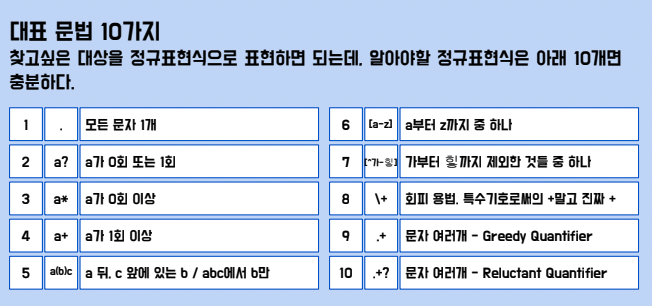

In [ ]:
import re

text = "ct cat caat ca0t cabc def CAT 캣 고양이 (cat) "

# re.findall('찾고 싶은 대상을 정규표현식으로 표현', 찾을 위치)

In [ ]:
# 1번 - .
print(re.findall(".", text))

['c', 't', ' ', 'c', 'a', 't', ' ', 'c', 'a', 'a', 't', ' ', 'c', 'a', '0', 't', ' ', 'c', 'a', 'b', 'c', ' ', 'd', 'e', 'f', ' ', 'C', 'A', 'T', ' ', '캣', ' ', '고', '양', '이', ' ', '(', 'c', 'a', 't', ')', ' ']


In [ ]:
# 2번 - ?
# re.findall("c?", text)
re.findall("ca?t", text)

['ct', 'cat', 'cat']

In [ ]:
# 3번 - *
re.findall("at*", text)

['at', 'a', 'at', 'a', 'a', 'at']

In [ ]:
#4번 - +
re.findall("ca+t", text)

['cat', 'caat', 'cat']

In [ ]:
# 5번 - ()
re.findall("ca(.)t", text)

['a', '0']

In [ ]:
# 6번 - []
print(re.findall("[a-z]", text))
print(re.findall("[A-Z]", text))

# re.findall("[a-z]+", text)
# re.findall("[a-z]+?", text)

['c', 't', 'c', 'a', 't', 'c', 'a', 'a', 't', 'c', 'a', 't', 'c', 'a', 'b', 'c', 'd', 'e', 'f', 'c', 'a', 't']
['C', 'A', 'T']


In [ ]:
text

'ct cat caat ca0t cabc def CAT 캣 고양이 (cat) '

In [ ]:
print(re.findall("[가-힣]", text))
print(re.findall("[가-힣]+", text))
# re.findall("[가-힣]+?", text)

['캣', '고', '양', '이']
['캣', '고양이']


In [ ]:
# 7번 - ^
re.findall("[^a-zA-Z\s]", text)

['0', '캣', '고', '양', '이']

In [ ]:
# 8번 - \
re.findall("[^a-zA-Z\s \( \)0-9]+", text)

['캣', '고양이']

In [ ]:
re.findall("[\(\)]", text)

['(', ')']

In [ ]:
text

'ct cat caat ca0t cabc def CAT 캣 고양이 (cat) '

In [ ]:
re.findall("\((.)a", text)

['c']

##### Greedy Q VS Reluctant Q

.+ 와 .+?는 모두 '문자열'이란 뜻으로 해석하면 된다.
- 다른 부연설명 없이 문자열이라는 표현

In [ ]:
Text = '''
삼성전자(영어: Samsung Electronics Co., Ltd.)는 반도체, 전자 제품, 통신 장비 등을 제조하는 세계 브랜드(brand) 가치 6위의 대한민국 기업이다.'''

- 소괄호 안에 감싸져 있는 문자열
- = \((문자열)\)
- = \((.+)\) 냐 아니면 \((.+?)\) 냐
- Greedy 를 쓸 것이냐, Reluctant 를 쓸 것이냐.
- 문법에서 말하는 탐욕적 수량자(Greedy Quantifier)란 가능하면 가장 큰 덩어리를 찾는다는 뜻이다.
- 반대의 개념인 게으른 수량자(Lazy Quantifier)는 패턴에 근접하는 최소한의 덩어리를 찾는다.

In [ ]:
# 9번
re.findall('\((.+)\)', Text)

['영어: Samsung Electronics Co., Ltd.)는 반도체, 전자 제품, 통신 장비 등을 제조하는 세계 브랜드(brand']

In [ ]:
# 10번

re.findall('\((.+?)\)', Text)

['영어: Samsung Electronics Co., Ltd.', 'brand']

# 문제

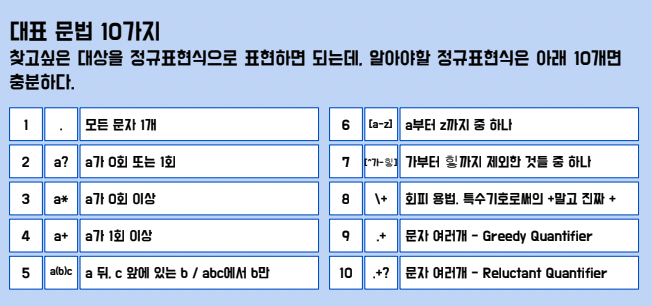

In [ ]:
import re

text = '''
        기업 삼성전자(영어: Samsung Electronics Co., Ltd.)는 반도체, 전자 제품, 통신 장비 등을 제조하는 세계 브랜드 가치 006위의 대한민국 기업이다
        '''

In [ ]:
# 6을 찾아보자 (브랜드 가치 순위)


['006']

In [ ]:
#@title
re.findall("[1-9]", text)

['6']

In [ ]:
# 삼성전자를 찾아보자
re.findall("삼성전자", text)

['삼성전자']

In [ ]:
#@title
re.findall("([가-힣]+)\(", text)

['삼성전자']

In [ ]:
# Samsung Electronics Co., Ltd. 를 찾아보자


In [ ]:
#@title
re.findall("\s([A-Za-z\.,\s]+)\)", text)

['Samsung Electronics Co., Ltd.']

In [ ]:
# 한글자모낱자 모두 포함하려면
text = "ㄱㄴㄷㄹ가나everything다라ㅏ:)ㅑㅓㅕ"

In [ ]:
re.findall("[ㄱ-ㅎㅏ-ㅣ가-힣]+", text)

['ㄱㄴㄷㄹ가나', '다라ㅏ', 'ㅑㅓㅕ']

#### 연습

##### 1번
아래 name_info는 국내 여성의 이름, 순위, 사람 수 정보가 하나의 문자열로 정리되어 있는 데이터를 담고 있다.  
정규표현식만을 이용해서 아래 name_info에서 사람 수(ex. 34,562, 31,854 등)만을 따로 리스트에 저장하는 한 줄 코드를 작성해보세요.

In [ ]:
name_info = '''서연	1	34,562  서윤	2	32,854  지우	3	28,729  서현	4	28,277  민서	5	27,308  하은	6	25,494  하윤	7	24,188
윤서	8	22,914  지민	9	22,244  지유	10	21,650  채원	11	21,406  지윤	12	20,253  은서	13	20,213  수아	14	19,501
다은	15	19,317  예은	16	18,943  수빈	17	18,195  지아	18	17,397  소율	19	17,145  예원	20	16,984  지원	21	16,677
예린	22	16,647  소윤	23	15,968  유진	24	14,787  시은	25	14,734  지안	26	14,513  하린	27	14,069  채은	28	14,057
가은	29	13,839  서영	30	13,651  윤아	31	13,625  민지	32	13,507  유나	33	13,267  예진	34	13,221  수민	35	12,927
수연	36	12,636  연우	37	12,302  예나	38	11,688  예서	39	11,686  주아	40	11,550  시연	41	11,489  서아	42	11,462
연서	43	11,136  현서	44	10,578  하율	45	10,545  다연	46	10,543  다인	47	10,503  아인	48	10,249  서은	49	10,180
서진	50	9,946  유빈	51	9,870  하연	52	9,798  유주	53	9,755  채윤	54	9,752  수현	55	9,732 시아	56	9,715  서율	57	9,586
지율	58	9,528  서우	59	9,467  예지	60	9,431  나윤	61	9,294  아린	62	9,154  다현	63	9,149  민주	64	8,807  지은	65	8,701
나연	66	8,602  소은	67	8,520  윤지	68	8,518  시현	69	8,497  예빈	70	8,431  지현	71	8,369  사랑	72	8,367  소연	73	8,341
혜원	74	7,988  서하	75	7,902  지수	76	7,876  은채	77	7,841  나은	78	7,796  주하	79	7,713  승아	80	7,452  아윤	81	7,446
서희	82	7,150  나현	83	7,096  소민	84	7,081  채아	85	7,073  민아	86	7,054  다윤	87	6,974  채린	88	6,965  세은	89	6,961
하영	90	6,906  도연	91	6,853  규리	92	6,812  아영	93	6,785  세아	94	6,602  지연	95	6,533  예림	96	6,480  가윤	97	6,433
태희	98	6,297  민채	99	6,260  주은	100	6,194'''

In [ ]:

count

['34,562',
 '32,854',
 '28,729',
 '28,277',
 '27,308',
 '25,494',
 '24,188',
 '22,914',
 '22,244',
 '21,650',
 '21,406',
 '20,253',
 '20,213',
 '19,501',
 '19,317',
 '18,943',
 '18,195',
 '17,397',
 '17,145',
 '16,984',
 '16,677',
 '16,647',
 '15,968',
 '14,787',
 '14,734',
 '14,513',
 '14,069',
 '14,057',
 '13,839',
 '13,651',
 '13,625',
 '13,507',
 '13,267',
 '13,221',
 '12,927',
 '12,636',
 '12,302',
 '11,688',
 '11,686',
 '11,550',
 '11,489',
 '11,462',
 '11,136',
 '10,578',
 '10,545',
 '10,543',
 '10,503',
 '10,249',
 '10,180',
 '9,946',
 '9,870',
 '9,798',
 '9,755',
 '9,752',
 '9,732',
 '9,715',
 '9,586',
 '9,528',
 '9,467',
 '9,431',
 '9,294',
 '9,154',
 '9,149',
 '8,807',
 '8,701',
 '8,602',
 '8,520',
 '8,518',
 '8,497',
 '8,431',
 '8,369',
 '8,367',
 '8,341',
 '7,988',
 '7,902',
 '7,876',
 '7,841',
 '7,796',
 '7,713',
 '7,452',
 '7,446',
 '7,150',
 '7,096',
 '7,081',
 '7,073',
 '7,054',
 '6,974',
 '6,965',
 '6,961',
 '6,906',
 '6,853',
 '6,812',
 '6,785',
 '6,602',
 '6,533',
 

##### 2번
정규표현식만을 이용하여 위의 name_info에서 순위만 따로 리스트에 저장하는 한 줄 코드를 작성해보세요.

##### 3번
위의 name_info에서 이름 중 '서'로 시작하는 이름(서O)의 빈도수를 따로 리스트에 저장하는 한 줄 코드를 작성해보세요.

In [ ]:
target_rank = re.findall('??', name_info)

In [ ]:
#확인
target = re.findall('??', name_info)

print(target_rank)
print(target)
len(target_rank), len(target)

['34,562', '32,854', '28,277', '13,651', '11,462', '10,180', '9,946', '9,586', '9,467', '7,902', '7,150']
['서연', '서윤', '서현', '서영', '서아', '서은', '서진', '서율', '서우', '서하', '서희']


(11, 11)

##### 4번
정상적인 이메일만 추출해주세요

In [ ]:
email_list = ['jkilee@gmail.com', 'kttredef@naver.com', 'akdef!aa.com', 'adekik@best.kr', 'abkereff@aacde', 'adefgree@korea.co.kr']


In [ ]:
ans = []

for email in email_list:
    ans.extend(re.findall('??', email))

ans

['jkilee@gmail.com',
 'kttredef@naver.com',
 'adekik@best.kr',
 'adefgree@korea.co.kr']

##### 5번
텍스트 중 <내용> 괄호로 묶여진 텍스트를 괄호 포함 모두 제거해주세요.
- 힌트 :  re.sub

In [ ]:
text = '안녕하세요 저는 <em>가나다</em> 입니다. 데이터분석가로 활동하고 있습니다. 제 <a href="portfolio.kr">포트폴리오</a>입니다'

'안녕하세요 저는 가나다 입니다. 데이터분석가로 활동하고 있습니다. 제 포트폴리오입니다'

안녕하세요 저는 가나다 입니다. 데이터분석가로 활동하고 있습니다. 제  .포트폴리오입니다


'안녕하세요 저는 가나다 입니다. 데이터분석가로 활동하고 있습니다. 제 포트폴리오입니다'

##### 6번
1. 정규표현식을 이용 \<span>내용\</span> 을 각각 추출
2. 추출된 항목에서 \<span>과 \</span> 태그를 모두제거
3. 각각 총 3개의 항목을 리스트에 넣기


In [ ]:
txt = '''<p>
<span>코로나19 사태 속에 지난해 물건 등을 살 때 카드를 이용한 금액이 10% 가까이 증가했다.</span>
<span>28일 금융감독원에 따르면 지난해 신용·체크카드 구매 이용액은 2020년보다 9.5% 늘어난 960조6천억원으로 잠정 집계됐다.</span>
<span>신용카드 이용액은 10.4% 늘어난 779조원, 체크카드 이용액은 5.6% 증가한 181조 6천억원이다.</span>
</p>'''

In [ ]:
res = []
??
res

['코로나19 사태 속에 지난해 물건 등을 살 때 카드를 이용한 금액이 10% 가까이 증가했다.',
 '28일 금융감독원에 따르면 지난해 신용·체크카드 구매 이용액은 2020년보다 9.5% 늘어난 960조6천억원으로 잠정 집계됐다.',
 '신용카드 이용액은 10.4% 늘어난 779조원, 체크카드 이용액은 5.6% 증가한 181조 6천억원이다.']

In [ ]:
res = re.findall('??', txt)
res

['코로나19 사태 속에 지난해 물건 등을 살 때 카드를 이용한 금액이 10% 가까이 증가했다.',
 '28일 금융감독원에 따르면 지난해 신용·체크카드 구매 이용액은 2020년보다 9.5% 늘어난 960조6천억원으로 잠정 집계됐다.',
 '신용카드 이용액은 10.4% 늘어난 779조원, 체크카드 이용액은 5.6% 증가한 181조 6천억원이다.']

#### [7-8번]  
신종코로나에 대한 뉴스 기사 페이지를 크롤링한 코드입니다.  
뉴스 기사 페이지는 resp.text 안에 들어가 있습니다.  


In [ ]:

import requests
import re

keyword = '신종코로나'
url = 'https://search.naver.com/search.naver'
params = {
    'query' : keyword,
    'where' : 'news'
}

resp = requests.get(url, params) # 해당 URL = url + params

print(resp.text) # html 전문은 브라우저를 통해 직접 확인하면서 풀어보세요.

<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="신종코로나 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'신종코로나'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="'신종코로나'의 네이버 뉴스검색 결과입니다."> <title>신종코로나 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstati

In [ ]:
resp.url

'https://search.naver.com/search.naver?query=%EC%8B%A0%EC%A2%85%EC%BD%94%EB%A1%9C%EB%82%98&where=news'

#### 7번
 정규표현식 중 Quantifier 용법을 이용해서 resp.text에서 첫번째 기사제목을 갖고 있는 a태그만을 가져오는 한줄 코드를 작성해보세요.

In [ ]:
a_tags = re.findall('??', resp.text)
a_tags

#### 8번  
resp.text로부터 기사 10개의 제목을 정규표현식으로 추출해보세요.

In [ ]:
titles = []
for a_tag in a_tags:
    title = re.findall('??', a_tag)[0].strip()
    titles.append(title)
titles

['코로나 후 美 10명 중 8명 재택…일자리 최우선 고려요인은 임금',
 '한국경제TV',
 '코로나 신규 확진 2만2961명...1주 전 대비 3000여명 감소',
 '[그래픽] 코로나19 수요일 신규 확진자 현황(24일)',
 '코로나19가 바꾼 인천공항 풍경…개별여행·비대면 출국 확산',
 '충북 어제 737명 코로나 확진…1주일 전보다 91명↓',
 '최근 1년간 실직자 40% “코로나 탓”',
 '인천 1156명 코로나19 확진…감염자 1명 사망',
 '“한국서 명품백은 ‘이것’”…코로나 이후 보복 소비에 외신도 주목',
 '코로나 확진 2만1385명…5일 연속 전주 대비 감소세']